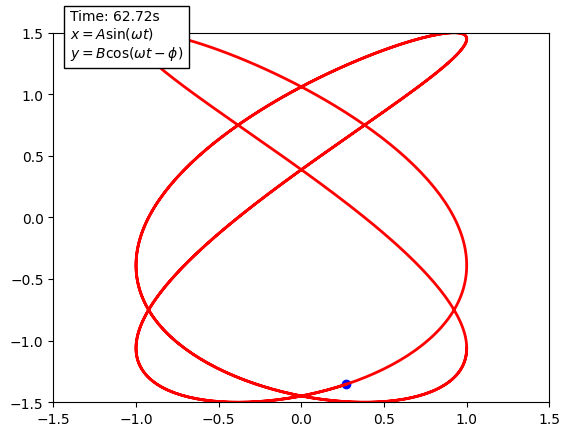

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')
# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Create a point object
point, = ax.plot([], [], 'bo', lw=12)

# Create an empty line for the evolving Lissajous figure
line, = ax.plot([], [], 'r-', lw=2)

# Create a text object for displaying time and phase
bbox_props = dict(facecolor='white', edgecolor='black', pad=4)
text = ax.text(-1.4, 1.3, '', fontsize=10, bbox=bbox_props)

# Initialize parameters for the Lissajous figure
A = 1.0  # Amplitude along the x-axis
B = 1.5  # Amplitude along the y-axis
a = 3    # Frequency along the x-axis
b = 2    # Frequency along the y-axis
phase = 5 * np.pi / 4  # Phase difference

# Initialize variables
t = 0.0
dt = 0.01
animation_start_time = None

# Function to calculate the x and y coordinates for the Lissajous figure
def calculate_lissajous(t):
    x = A * np.cos(a * t)
    y = B * np.sin(b * t + phase)
    return x, y

# Function to update the animation
def update(frame):
    global t, animation_start_time

    if animation_start_time is None:
        animation_start_time = datetime.now()

    # Calculate x and y coordinates for the current frame
    x, y = calculate_lissajous(t)

    # Update the point position
    point.set_data(x, y)

    # Update the line with the evolving Lissajous figure
    line.set_data(*calculate_lissajous(np.linspace(0, t, 1000)))

    # Calculate the current time of the animation
    current_time = datetime.now() - animation_start_time
    total_time = current_time.total_seconds()

    # Update the text with time and phase information
    time_text = 'Time: {:.2f}s'.format(total_time)
    x_text = r'$x = A \sin(\omega t)$'
    y_text = r'$y = B \cos(\omega t - \phi)$'
    text.set_text('\n'.join([time_text, x_text, y_text]))

    # Increment the time for the next frame
    t += dt

    return point, line, text

# Create the animation
animation = FuncAnimation(fig, update, frames=1000, interval=20, blit=True)

from IPython.display import HTML

# Create the animation and save it as a HTML5 video
ani = FuncAnimation(fig, update, frames=1000, interval=20, blit=True)
ani.save('animation.html', writer='html')

# Display the HTML5 video in the notebook
HTML('animation.html')
